In [1]:
#Kutuphaneler
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataFrame = pd.read_csv('features.csv')#Veri setimizi degiskene atadik
dataFrame = dataFrame.sample(frac=1, random_state=0).reset_index(drop=True)#DataFrame'deki verilerin yerlerini rasgele degistirdik
dataFrame.head()#Dataframe'deki verileri gosteriyoruz

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,reggae.00048.2.wav,66149,0.372060,0.091308,0.120653,0.001287,2863.575280,542673.071796,2596.028644,55705.526777,...,50.712162,-1.865458,57.059864,7.426891,38.414814,-6.095347,53.098068,-4.039930,56.471512,reggae
1,reggae.00086.5.wav,66149,0.733551,0.015941,0.418318,0.000213,5414.708959,7159.380965,3223.250146,3010.863195,...,1.553053,-5.360513,3.853597,-2.058677,14.231124,-3.343481,9.602206,-1.401847,0.282131,reggae
2,rock.00069.6.wav,66149,0.325368,0.089568,0.051838,0.000534,3032.420576,918717.024799,2452.805187,75332.574389,...,61.315834,-13.197737,34.461765,-1.891385,60.532436,-6.796290,98.297424,-3.002217,52.876480,rock
3,blues.00079.9.wav,66149,0.472334,0.074339,0.267231,0.002148,2336.402230,156111.492919,2332.833082,30868.328578,...,31.954609,-13.642503,43.941143,4.235998,21.990633,-7.163545,28.251629,-0.605158,19.771526,blues
4,rock.00086.4.wav,66149,0.440494,0.071545,0.135566,0.000855,2521.352339,83211.660919,2017.155021,28492.839073,...,24.630066,-6.051273,40.086929,6.421707,41.819939,-7.139108,26.480080,-0.982220,27.456194,rock


In [3]:
dataFrame_X = dataFrame.iloc[:,2:-1]#Degiskene muzik turunu tahmin etmek icin kullanilacak olan sutunlari ayirip atadik
dataFrame_X.head()#Dataframe'deki verileri gosteriyoruz

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.372060,0.091308,0.120653,0.001287,2863.575280,542673.071796,2596.028644,55705.526777,5962.875225,8.561119e+05,...,4.791413,50.712162,-1.865458,57.059864,7.426891,38.414814,-6.095347,53.098068,-4.039930,56.471512
1,0.733551,0.015941,0.418318,0.000213,5414.708959,7159.380965,3223.250146,3010.863195,9274.681866,1.307108e+03,...,-2.771570,1.553053,-5.360513,3.853597,-2.058677,14.231124,-3.343481,9.602206,-1.401847,0.282131
2,0.325368,0.089568,0.051838,0.000534,3032.420576,918717.024799,2452.805187,75332.574389,5978.362568,1.522412e+06,...,6.433334,61.315834,-13.197737,34.461765,-1.891385,60.532436,-6.796290,98.297424,-3.002217,52.876480
3,0.472334,0.074339,0.267231,0.002148,2336.402230,156111.492919,2332.833082,30868.328578,5106.516301,3.864486e+05,...,3.136367,31.954609,-13.642503,43.941143,4.235998,21.990633,-7.163545,28.251629,-0.605158,19.771526
4,0.440494,0.071545,0.135566,0.000855,2521.352339,83211.660919,2017.155021,28492.839073,4659.205416,3.066795e+05,...,6.682501,24.630066,-6.051273,40.086929,6.421707,41.819939,-7.139108,26.480080,-0.982220,27.456194


In [4]:
#Kullanacagimiz veriler arasinda string deger kabul edilmeyecegi icin label sutunundaki verileri sayisal degerlere karsilik gelecek sekilde degistirdik.
label = dataFrame.iloc[:,-1:].values#Degiskene label sutunumuzdaki degerleri atadik
le = LabelEncoder()#Kullanacagimiz siniftan nesne turettik
label[:,0] = le.fit_transform(dataFrame.iloc[:,-1])#Sutundaki string degerleri sayisal degerlere cevirdik
dataFrame_Y = pd.DataFrame(data=label, index=range(len(dataFrame.index)))#Numpy diziyi DataFrame'e cevirdik
dataFrame_Y.head()#Dataframe'deki verileri gosteriyoruz

,0
0,8
1,8
2,9
3,0
4,9


In [5]:
X = np.append(arr = np.ones((len(dataFrame.index), 1)).astype(float), values = dataFrame_X.values, axis = 1)#DataFrame'deki X(muzik turunu tahmin etmek icin kullanilacak veriler) verilerini diziye ekledik
liste = list(range(0, len(dataFrame_X.columns)))#kullanilacak sutunlari listeye cevirdik

In [6]:
#Burada butun sutunlari girip 'p' degerlerine bakarak bazi sutunlari kaldirmak icin kullanicaz
X_l1 = X[:,liste]#Degerlendirmeye alinacak olan satirlari, sutunlari belirleyip ayirarak degiskene atadik
model1 = sm.OLS(dataFrame_Y.values.astype(float), X_l1.astype(float)).fit()#Tahmin edilecek sutunu ve kullanilacak diger sutunlari girerek modelimizi olusturduk
model1.summary()#Cikan modelin ozeti

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     69.96
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        12:03:59   Log-Likelihood:                -23055.
No. Observations:                9990   AIC:                         4.622e+04
Df Residuals:                    9933   BIC:                         4.663e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6270      1.268     -3.649      0.000      -7.113      -2.142
x1             1.8753      0.544      3.450      0.001       0.810       2.941
x2            -4.8402      4.025     -1.202      0.229     -12.730       3.050
x3           -11.9518      2.548     -4.691      0.000     -16.946      -6.958
x4           -99.3775     13.336     -7.452      0.000    -125.519     -73.236
x5             0.0051      0.000     11.442      0.000       0.004       0.006
x6         -4.998e-07   2.55e-07     -1.957      0.050      -1e-06    8.39e-10
x7             0.0019      0.000      4.687      0.000       0.001       0.003
x8           1.09e-07    6.3e-07      0.173      0.863   -1.13e-06    1.34e-06
x9            -0.0013      0.000     -7.882      0.000      -0.002      -0.001
x10         5.568e-07   6.37e-08      8.735      0.000    4.32e-07    6.82e-07
x11          -28.2343      2.766    -10.208      0.000     -33.656     -22.812
x12           70.0599     19.167      3.655      0.000      32.489     107.630
x13         -115.2514     17.516     -6.580      0.000    -149.586     -80.917
x14           24.5711      7.617      3.226      0.001       9.641      39.501
x15           38.1296     27.825      1.370      0.171     -16.413      92.672
x16           11.1904     11.146      1.004      0.315     -10.657      33.038
x17            0.0003      0.001      0.417      0.677      -0.001       0.002
x18            0.0071      0.001      6.964      0.000       0.005       0.009
x19         4.533e-05   1.37e-05      3.300      0.001    1.84e-05    7.23e-05
x20            0.0304      0.003      9.597      0.000       0.024       0.037
x21           -0.0004      0.000     -3.300      0.001      -0.001      -0.000
x22           -0.0226      0.002     -9.370      0.000      -0.027      -0.018
x23            0.0002      0.000      1.570      0.116   -4.79e-05       0.000
x24            0.0133      0.002      5.489      0.000       0.009       0.018
x25            0.0006      0.000      2.183      0.029    6.06e-05       0.001
x26           -0.0227      0.003     -7.342      0.000      -0.029      -0.017
x27           -0.0014      0.000     -4.226      0.000      -0.002      -0.001
x28            0.0169      0.004      4.470      0.000       0.009       0.024
x29            0.0008      0.001      1.685      0.092      -0.000       0.002
x30            0.0304      0.004      7.567      0.000       0.023       0.038
x31            0.0017      0.001      3.003      0.003       0.001       0.003
x32            0.0071      0.004      1.604      0.109      -0.002       0.016
x33         6.094e-05      0.001      0.078      0.938      -0.001       0.002
x34            0.0343      0.004      7.714      0.000       0.026       0.043
x35            0.0017      0.001      2.173      0.030       0.000       0.003
x3

In [7]:
#Yukaridaki degerleri inceleyip 'p>5' olan sutunlari kaldirip 'R-squared' degerinin artip artmadigini kontrol edicez
#Kaldirilacak sutunlar: 8, 17, 33, 55
liste.remove(8)
liste.remove(17)
liste.remove(33)
liste.remove(35)
X_l1 = X[:,liste]#Degerlendirmeye alinacak sutunlari belirleyip, ayirip degiskene atadik
#Tahmin edilecek sutunu ve kullanilacak diger sutunlari girerek modelimizi olusturduk
model1 = sm.OLS(dataFrame_Y.values.astype(float), X_l1.astype(float)).fit()
model1.summary()#Cikan modelin ozeti

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     75.24
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        12:03:59   Log-Likelihood:                -23057.
No. Observations:                9990   AIC:                         4.622e+04
Df Residuals:                    9937   BIC:                         4.660e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5561      1.259     -3.618      0.000      -7.024      -2.088
x1             1.9238      0.543      3.543      0.000       0.860       2.988
x2            -4.3970      4.017     -1.095      0.274     -12.271       3.478
x3           -11.9589      2.541     -4.706      0.000     -16.941      -6.977
x4           -99.3100     13.311     -7.461      0.000    -125.403     -73.217
x5             0.0051      0.000     11.467      0.000       0.004       0.006
x6         -5.052e-07   2.53e-07     -1.996      0.046      -1e-06   -9.11e-09
x7             0.0018      0.000      4.677      0.000       0.001       0.003
x8            -0.0013      0.000     -7.864      0.000      -0.002      -0.001
x9          5.648e-07   4.78e-08     11.816      0.000    4.71e-07    6.59e-07
x10          -28.3171      2.760    -10.261      0.000     -33.726     -22.908
x11           69.8099     19.109      3.653      0.000      32.353     107.267
x12         -114.9065     17.515     -6.560      0.000    -149.239     -80.574
x13           24.6783      7.608      3.244      0.001       9.765      39.592
x14           36.8362     27.796      1.325      0.185     -17.649      91.322
x15           11.5016     11.127      1.034      0.301     -10.310      33.314
x16            0.0071      0.001      6.999      0.000       0.005       0.009
x17         4.679e-05   1.37e-05      3.417      0.001    1.99e-05    7.36e-05
x18            0.0302      0.003      9.534      0.000       0.024       0.036
x19           -0.0003      0.000     -3.299      0.001      -0.001      -0.000
x20           -0.0226      0.002     -9.383      0.000      -0.027      -0.018
x21            0.0002      0.000      1.587      0.112   -4.56e-05       0.000
x22            0.0131      0.002      5.422      0.000       0.008       0.018
x23            0.0006      0.000      2.288      0.022    8.88e-05       0.001
x24           -0.0227      0.003     -7.375      0.000      -0.029      -0.017
x25           -0.0013      0.000     -4.022      0.000      -0.002      -0.001
x26            0.0167      0.004      4.427      0.000       0.009       0.024
x27            0.0009      0.000      1.891      0.059   -3.45e-05       0.002
x28            0.0302      0.004      7.552      0.000       0.022       0.038
x29            0.0019      0.001      3.455      0.001       0.001       0.003
x30            0.0075      0.004      1.688      0.091      -0.001       0.016
x31            0.0342      0.004      7.715      0.000       0.026       0.043
x32           -0.0269      0.005     -5.517      0.000      -0.036      -0.017
x33            0.0010      0.001      1.284      0.199      -0.001       0.003
x34            0.0206      0.005      4.126      0.000       0.011       0.030
x35           -0.0021      0.001     -2.439      0.015      -0.004      -0.000
x3

In [8]:
#Yukaridaki degerleri inceledegimizde bu 4 degisken kaldirildiginda daha verimli tahminler yapacaktir
dataFrame_X = pd.concat([dataFrame_X.iloc[:,:7], dataFrame_X.iloc[:,8:16], dataFrame_X.iloc[:,17:32], dataFrame_X.iloc[:,33:54], dataFrame_X.iloc[:,55:]], axis=1)#8, 17, 33, 55 disinda kalan sutunlari birlesitirdik
dataFrame_X.head()#Dataframe'deki verileri gosteriyoruz

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,rolloff_mean,rolloff_var,zero_crossing_rate_mean,...,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc20_mean,mfcc20_var
0,0.372060,0.091308,0.120653,0.001287,2863.575280,542673.071796,2596.028644,5962.875225,8.561119e+05,0.125064,...,40.559952,4.791413,50.712162,-1.865458,57.059864,7.426891,38.414814,-6.095347,-4.039930,56.471512
1,0.733551,0.015941,0.418318,0.000213,5414.708959,7159.380965,3223.250146,9274.681866,1.307108e+03,0.320282,...,1.481917,-2.771570,1.553053,-5.360513,3.853597,-2.058677,14.231124,-3.343481,-1.401847,0.282131
2,0.325368,0.089568,0.051838,0.000534,3032.420576,918717.024799,2452.805187,5978.362568,1.522412e+06,0.177892,...,44.189091,6.433334,61.315834,-13.197737,34.461765,-1.891385,60.532436,-6.796290,-3.002217,52.876480
3,0.472334,0.074339,0.267231,0.002148,2336.402230,156111.492919,2332.833082,5106.516301,3.864486e+05,0.111937,...,24.367863,3.136367,31.954609,-13.642503,43.941143,4.235998,21.990633,-7.163545,-0.605158,19.771526
4,0.440494,0.071545,0.135566,0.000855,2521.352339,83211.660919,2017.155021,4659.205416,3.066795e+05,0.166335,...,31.272593,6.682501,24.630066,-6.051273,40.086929,6.421707,41.819939,-7.139108,-0.982220,27.456194


In [9]:
dataFrame = pd.concat([dataFrame_X, dataFrame_Y], axis=1)#Degiskene muzik turunu tahmin etmek icin kullanilacak olan sutunlari ayirip atadik
dataFrame.head()#Dataframe'deki verileri gosteriyoruz

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,rolloff_mean,rolloff_var,zero_crossing_rate_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc20_mean,mfcc20_var,0
0,0.372060,0.091308,0.120653,0.001287,2863.575280,542673.071796,2596.028644,5962.875225,8.561119e+05,0.125064,...,4.791413,50.712162,-1.865458,57.059864,7.426891,38.414814,-6.095347,-4.039930,56.471512,8
1,0.733551,0.015941,0.418318,0.000213,5414.708959,7159.380965,3223.250146,9274.681866,1.307108e+03,0.320282,...,-2.771570,1.553053,-5.360513,3.853597,-2.058677,14.231124,-3.343481,-1.401847,0.282131,8
2,0.325368,0.089568,0.051838,0.000534,3032.420576,918717.024799,2452.805187,5978.362568,1.522412e+06,0.177892,...,6.433334,61.315834,-13.197737,34.461765,-1.891385,60.532436,-6.796290,-3.002217,52.876480,9
3,0.472334,0.074339,0.267231,0.002148,2336.402230,156111.492919,2332.833082,5106.516301,3.864486e+05,0.111937,...,3.136367,31.954609,-13.642503,43.941143,4.235998,21.990633,-7.163545,-0.605158,19.771526,0
4,0.440494,0.071545,0.135566,0.000855,2521.352339,83211.660919,2017.155021,4659.205416,3.066795e+05,0.166335,...,6.682501,24.630066,-6.051273,40.086929,6.421707,41.819939,-7.139108,-0.982220,27.456194,9


In [10]:
x_train, x_test, y_train, y_test = train_test_split(dataFrame_X.values, dataFrame_Y.values, test_size=0.33, random_state=0)#Verileri egitim ve test icin bolduk

In [11]:
#Verileri olceklendiriyoruz
#y = tahmin edilecek sutun, x = tahmin edilecek sutun icin kullanilacak diger sutunlar
sc = StandardScaler()#Kullanacagimiz siniftan nesne turettik
X_train = sc.fit_transform(x_train)#Egitim verilerinin x sutunlari
Y_train = sc.fit_transform(y_train)#Egitim verilerinin y sutunu
X_test = sc.fit_transform(x_test)#Test verilerinin x sutunlari
Y_test = sc.fit_transform(y_test)#Test verilerinin y sutunu

In [12]:
Y_train = Y_train.astype('int')#Veri turunu integer olarak degistirdik
Y_test = Y_test.astype('int')#Veri turunu integer olarak degistirdik

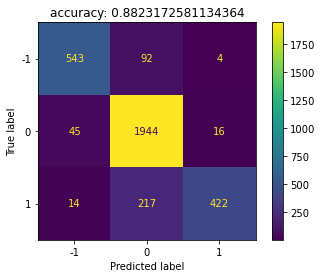

In [13]:
#Random Forest (Rastgele Orman) Algoritmasi
rfc = RandomForestClassifier(n_estimators=100, criterion = 'entropy')#Algoritmanin nesnesini olusturduk
rfc.fit(X_train, Y_train.ravel())#Algoritmayi egittik
accuracy = rfc.score(X_test, Y_test.ravel())#Algoritmanin dogrulugu
plot_confusion_matrix(rfc, X_test, Y_test.ravel())#Model ciktisi
plt.title("accuracy: " + str(accuracy))#Seklin basligini yazdik
plt.show()#Sekli yazdirdik

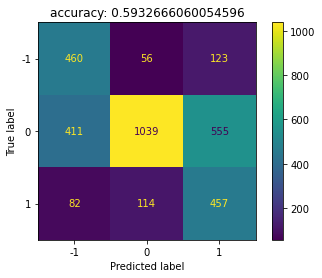

In [14]:
#Gaussian Naive Bayes Algoritmasi
gnb = GaussianNB()#Algoritmanin nesnesini olusturduk
gnb.fit(X_train, Y_train.ravel())#Algoritmayi egittik
accuracy = gnb.score(X_test, Y_test.ravel())#Algoritmanin dogrulugu
plot_confusion_matrix(gnb, X_test, Y_test.ravel())#Model ciktisi
plt.title("accuracy: " + str(accuracy))#Seklin basligini yazdik
plt.show()#Sekli yazdirdik

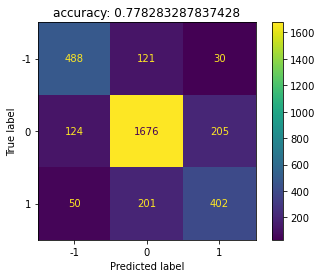

In [15]:
#Decision Tree (Karar Agaci) Algoritmasi
dtc = DecisionTreeClassifier(criterion = 'entropy')#Algoritmanin nesnesini olusturduk
dtc.fit(X_train, Y_train.ravel())#Algoritmayi egittik
accuracy = dtc.score(X_test, Y_test.ravel())#Algoritmanin dogrulugu
plot_confusion_matrix(dtc, X_test, Y_test.ravel())#Model ciktisi
plt.title("accuracy: " + str(accuracy))#Seklin basligini yazdik
plt.show()#Sekli yazdirdik

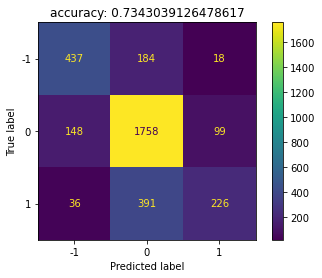

In [21]:
#Logistic Regression (Lojistik Regresyon) Algoritmasi
logr = LogisticRegression(random_state=0, max_iter=1000)#Algoritmanin nesnesini olusturduk
logr.fit(X_train, Y_train.ravel())#Algoritmayi egittik
accuracy = logr.score(X_test, Y_test.ravel())#Algoritmanin dogrulugu
plot_confusion_matrix(logr, X_test, Y_test.ravel())#Model ciktisi
plt.title("accuracy: " + str(accuracy))#Seklin basligini yazdik
plt.show()#Sekli yazdirdik

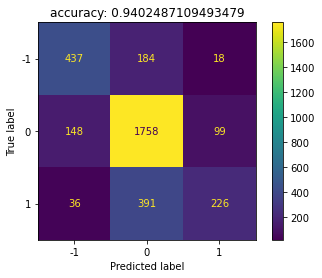

In [22]:
#K-Nearest Neighbors (K-En Yakin Komsu) Algoritmasi
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')#Algoritmanin nesnesini olusturduk
knn.fit(X_train, Y_train.ravel())#Algoritmayi egittik
accuracy = knn.score(X_test, Y_test.ravel())#Algoritmanin dogrulugu
plot_confusion_matrix(logr, X_test, Y_test.ravel())#Model ciktisi
plt.title("accuracy: " + str(accuracy))#Seklin basligini yazdik
plt.show()#Sekli yazdirdik